# **Data Setup and Cleaning:**

Setting up PyDrive so that I can load my dataset from Google Drive:

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root_path = 'drive/My Drive/your_project_folder/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Importing the common libraries that I will use:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing and checking out my dataset stored on Google Drive:

The dataset consists of news articles scraped from the Times of India website, from late 2017 to June 2018, it is a collection of articles that are flagged for being on fake news through WhatsApp. This is not a dataset for fake articles, but is a useful dataset to look for data about fake news spread through WhatsApp.

This is the source for my dataset: https://github.com/sahitpj/India-WhatsAppFakeNews-Dataset

In [ ]:
fake_news_data = pd.read_csv("/content/drive/My Drive/DH100_Students_2020/Notebook_SandBox/Student_Workspace/Waadhwa/whatsapp_fake_news_data.csv")

In [ ]:
fake_news_data.head()

,Unnamed: 0,date,day,filename,flag,id,keywords,link,month,place,publisher,year
0,0,2018/03/29,29.0,/Users/Sahit/Documents/GitHub/Article-Analysis...,0,64111,[],http://timesofindia.indiatimes.com//city/nagpu...,3.0,nagpur,TOI,2018.0
1,1,2017/01/24,24.0,/Users/Sahit/Documents/GitHub/Article-Analysis...,0,130425,[],http://timesofindia.indiatimes.com//india/jk-g...,1.0,NaN,TOI,2017.0
2,2,2017/01/31,31.0,/Users/Sahit/Documents/GitHub/Article-Analysis...,0,135704,[],http://timesofindia.indiatimes.com//city/kolha...,1.0,kolhapur,TOI,2017.0
3,3,2018/03/26,26.0,/Users/Sahit/Documents/GitHub/Article-Analysis...,0,62302,[],http://timesofindia.indiatimes.com//city/hubba...,3.0,hubballi,TOI,2018.0
4,4,2017/02/20,20.0,/Users/Sahit/Documents/GitHub/Article-Analysis...,0,150002,[],http://timesofindia.indiatimes.com//city/mumba...,2.0,mumbai,TOI,2017.0


Now I will drop all the null values:

In [ ]:
fake_news_data = fake_news_data.dropna()

Dropping columns that are not particularly helpful:

In [ ]:
fake_news_data = fake_news_data.drop(columns={"Unnamed: 0", "filename", "publisher"})

Converting all float values to int as the columns of day, month, year are more useful that way:

In [ ]:
fake_news_data["day"] = fake_news_data["day"].astype(int)
fake_news_data["month"] = fake_news_data["month"].astype(int)
fake_news_data["year"] = fake_news_data["year"].astype(int)
fake_news_data

,date,day,flag,id,keywords,link,month,place,year
0,2018/03/29,29,0,64111,[],http://timesofindia.indiatimes.com//city/nagpu...,3,nagpur,2018
2,2017/01/31,31,0,135704,[],http://timesofindia.indiatimes.com//city/kolha...,1,kolhapur,2017
3,2018/03/26,26,0,62302,[],http://timesofindia.indiatimes.com//city/hubba...,3,hubballi,2018
4,2017/02/20,20,0,150002,[],http://timesofindia.indiatimes.com//city/mumba...,2,mumbai,2017
6,2017/07/29,29,0,266297,[],http://timesofindia.indiatimes.com//city/udaip...,7,udaipur,2017
...,...,...,...,...,...,...,...,...,...
210121,2018/02/15,15,0,33409,[],http://timesofindia.indiatimes.com//city/vadod...,2,anand,2018
210122,2017/03/30,30,0,177619,[],http://timesofindia.indiatimes.com//city/noida...,3,beijing,2017
210123,2017/09/18,18,0,303944,[],http://timesofindia.indiatimes.com//city/chand...,9,chandigarh,2017
210124,2017/02/23,23,0,152065,[],http://timesofindia.indiatimes.com//city/manga...,2,mangaluru,2017


Now I will move on to do Exploratory Data Analysis (EDA) on this dataset.

# **Exploratory Data Analysis (EDA):**

Exploring number of articles flagged i.e classification into real and fake news:

In [ ]:
fake_news_data["flag"].value_counts()

0    145796
1       617
Name: flag, dtype: int64

Exploring keywords in the articles, with the keywords, besides 'whatsapp', being lst = ['police', 'arrest', 'crime', 'jail', 'lynch', 'kill', 'fire', 'riots', 'hate', 'death', 'dead', 'fir']:

I use value_counts[1:] so that I don't see the number of articles without any keywords.

In [ ]:
fake_news_data["keywords"].value_counts()[1:]

['whatsapp']                                                472
['whatsapp', 'police']                                      319
['whatsapp', 'police', 'crime']                              52
['whatsapp', 'police', 'fir']                                43
['whatsapp', 'police', 'arrest']                             37
['whatsapp', 'police', 'death']                              18
['whatsapp', 'fir']                                          13
['whatsapp', 'death']                                        11
['whatsapp', 'police', 'arrest', 'fir']                       9
['whatsapp', 'police', 'kill']                                7
['whatsapp', 'crime']                                         7
['whatsapp', 'police', 'fire']                                7
['whatsapp', 'fire']                                          7
['whatsapp', 'police', 'crime', 'fir']                        6
['whatsapp', 'police', 'dead']                                6
['whatsapp', 'police', 'crime', 'kill'] 

Exploring geographic location of the article/incident:

In [ ]:
fake_news_data["place"].value_counts().head(10)

mumbai        10544
chennai        7325
hyderabad      7008
nagpur         6661
chandigarh     5826
bengaluru      5760
ahmedabad      5489
lucknow        5406
pune           5180
kolkata        5137
Name: place, dtype: int64

Removing all entries from the dataset that do not contain any keywords:

In [ ]:
fake_news_data = fake_news_data[fake_news_data["keywords"] != "[]"]
fake_news_data.head()

,date,day,flag,id,keywords,link,month,place,year
884,2018/01/30,30,1,21489,"['whatsapp', 'police', 'fir']",http://timesofindia.indiatimes.com//city/patna...,1,patna,2018
1260,2017/07/25,25,1,263344,"['whatsapp', 'police', 'jail']",http://timesofindia.indiatimes.com//city/chand...,7,ludhiana,2017
1406,2018/06/04,4,1,112479,"['whatsapp', 'police']",http://timesofindia.indiatimes.com//city/chenn...,6,chennai,2018
1836,2018/02/10,10,1,29774,"['whatsapp', 'police']",http://timesofindia.indiatimes.com//home/educa...,2,pune,2018
2276,2018/04/01,1,1,66304,"['whatsapp', 'police', 'arrest']",http://timesofindia.indiatimes.com//city/ranch...,4,ranchi,2018


Checking how many articles are now flagged as containing content on fake news:

In [ ]:
fake_news_data["flag"].value_counts()

1    617
0    472
Name: flag, dtype: int64

Hence, now there are more articles flagged as containing information on fake news than articles not discussing fake news.

Creating a new dataframe consisting of only the entries that are flagged for containing information on fake news:

In [ ]:
flagged = fake_news_data[fake_news_data["flag"] == 1]
flagged = flagged.drop(columns={"flag"})
flagged.head()

,date,day,id,keywords,link,month,place,year
884,2018/01/30,30,21489,"['whatsapp', 'police', 'fir']",http://timesofindia.indiatimes.com//city/patna...,1,patna,2018
1260,2017/07/25,25,263344,"['whatsapp', 'police', 'jail']",http://timesofindia.indiatimes.com//city/chand...,7,ludhiana,2017
1406,2018/06/04,4,112479,"['whatsapp', 'police']",http://timesofindia.indiatimes.com//city/chenn...,6,chennai,2018
1836,2018/02/10,10,29774,"['whatsapp', 'police']",http://timesofindia.indiatimes.com//home/educa...,2,pune,2018
2276,2018/04/01,1,66304,"['whatsapp', 'police', 'arrest']",http://timesofindia.indiatimes.com//city/ranch...,4,ranchi,2018


Checking again to see the top cities for these articles on fake news:

In [ ]:
flagged["place"].value_counts().head()

mumbai       73
hyderabad    36
bengaluru    32
lucknow      27
kolkata      25
Name: place, dtype: int64

Exploring year wise distribution of these articles:

In [ ]:
flagged["year"].value_counts().head()

2017    312
2018    305
Name: year, dtype: int64

Visualizing change in number of articles over the year:

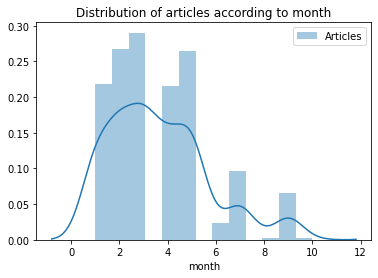

In [ ]:
sns.distplot(flagged["month"], label="Articles");
plt.title('Distribution of articles according to month');
plt.legend();

Checking again to see the top keywords in this dataframe:

In [ ]:
flagged["keywords"].value_counts()

['whatsapp', 'police']                                      319
['whatsapp', 'police', 'crime']                              52
['whatsapp', 'police', 'fir']                                43
['whatsapp', 'police', 'arrest']                             37
['whatsapp', 'police', 'death']                              18
['whatsapp', 'fir']                                          13
['whatsapp', 'death']                                        11
['whatsapp', 'police', 'arrest', 'fir']                       9
['whatsapp', 'fire']                                          7
['whatsapp', 'crime']                                         7
['whatsapp', 'police', 'kill']                                7
['whatsapp', 'police', 'fire']                                7
['whatsapp', 'police', 'dead']                                6
['whatsapp', 'police', 'crime', 'fir']                        6
['whatsapp', 'police', 'death', 'dead']                       5
['whatsapp', 'kill']                    

Visualizing the most popular keywords:

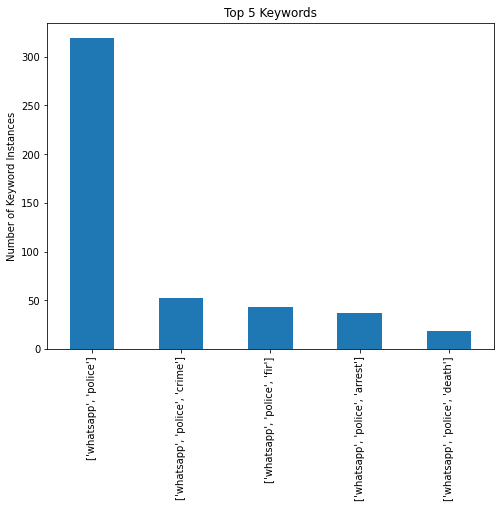

In [ ]:
plt.figure(figsize=(8, 6))
flagged["keywords"].value_counts().head(5).plot(kind="bar")
plt.ylabel("Number of Keyword Instances")
plt.title("Top 5 Keywords");

Hence, the top keywords remain similar. The word 'police' is present in a massive number of articles, along with other keywords. The flagged dataframe narrows down articles talking about WhatsApp generally and the ones who relate to fake news through WhatsApp.

Now I will move on to analyze tweet data from Twitter using various tools and methods.

# **Using Tools and Methods:**

Tweepy is an easy-to-use Python library for accessing the Twitter API.

First, I am going to import Tweepy and set up keys and tokens that I received with my Twitter Developer account to access the Twitter API:

Here is the documentation for Tweepy I used to set it up: https://github.com/tweepy/tweepy

In [ ]:
import tweepy as tw
consumer_key = "7vqQZFF30z2N1ep1zl5ZB0Ml3"
consumer_secret = "M6LkdFyjW4GDKh4jdMAaQKk6gMnFU8WhdXXE2F7HgyPnwOBx0q"
access_token = "323089642-N2oQtvnAMCLptyvmPeVgUFDfPqPfIHNdY85ZJS57"
access_token_secret = "FIEzPmMyTgkY4Jel3y2kI4sRcHrLmSshwj4GFz2GjBkkh"

In [ ]:
auth = tw.AppAuthHandler(consumer_key, consumer_secret)

Setting up my search query and getting results from it:

In [ ]:
search_words = "india fake news"

api = tw.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweets = tw.Cursor(api.search,q=search_words, lang="en").items()

Filtering out the retweets to remove redundancy:

In [ ]:
new_search = search_words + " -filter:retweets"
new_search

'india fake news -filter:retweets'

In [ ]:
tweets = tw.Cursor(api.search,q=new_search,lang="en").items()

all_tweets =[tweet.text for tweet in tweets]

Rate limit reached. Sleeping for: 182


Obtaining user and tweet data for every tweet:

In [ ]:
tweets = tw.Cursor(api.search,q=new_search, lang="en").items()

users_locs = [[tweet.user.screen_name, tweet.user.location, tweet.created_at, tweet.text, tweet.retweet_count, tweet.source] for tweet in tweets]
users_locs[:5]

[['netargument',
  'New Delhi, India',
  datetime.datetime(2020, 6, 26, 20, 32, 52),
  '@LipeEstevao @ashoswai No, Bhutan has rather clarified about the fake news of water blockage and confirmed their solidarity with India',
  0,
  'Twitter Web App'],
 ['Mihika63475128',
  '',
  datetime.datetime(2020, 6, 26, 20, 29, 51),
  '@moronhumor They are jobless to such an extent they create FAKE news for Psycho happiness.Pakistan is worst at many… https://t.co/fJHp6VcGfJ',
  0,
  'Twitter for iPhone'],
 ['YashaswiniMaha4',
  'Agra, India',
  datetime.datetime(2020, 6, 26, 20, 22, 42),
  'So someone I know is saying that this thing that happened in South India might not be true and.might be manipulated… https://t.co/oZjHUE3td4',
  0,
  'Twitter for Android'],
 ['Trumploveyou1',
  'Washington, USA',
  datetime.datetime(2020, 6, 26, 20, 18, 37),
  '@globaltimesnews India has done a good job in fighting the virus, and I am very happy that Mr. Modi has listened to… https://t.co/qKoeQPW07p',
  0,
  

Removing URLs from the tweets so that I can process the data more efficiently:

In [ ]:
def remove_url(txt):
  return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]

In [ ]:
tweet_text = pd.DataFrame(data=users_locs, columns=['user', "location", 'time', 'text', 'retweet count', 'source'])
tweet_text

,user,location,time,text,retweet count,source
0,netargument,"New Delhi, India",2020-06-26 20:32:52,"@LipeEstevao @ashoswai No, Bhutan has rather c...",0,Twitter Web App
1,Mihika63475128,,2020-06-26 20:29:51,@moronhumor They are jobless to such an extent...,0,Twitter for iPhone
2,YashaswiniMaha4,"Agra, India",2020-06-26 20:22:42,So someone I know is saying that this thing th...,0,Twitter for Android
3,Trumploveyou1,"Washington, USA",2020-06-26 20:18:37,@globaltimesnews India has done a good job in ...,0,Twitter for iPhone
4,karthiktvm1990,India,2020-06-26 20:07:32,@TenzingLamsang @PrakashJavdekar @PMOIndia \nS...,0,Twitter for Android
...,...,...,...,...,...,...
3860,juyalash,chandigarh,2020-06-18 12:14:34,@bainjal D question to be asked is here did d ...,1,Twitter for Android
3861,I_CheckFacts,,2020-06-18 12:12:59,"@free_thinker Hi, I am fact check bot and woul...",0,FactCheckMachine
3862,I_CheckFacts,,2020-06-18 12:12:40,"@AltNews Hi, I am fact check bot and would lik...",0,FactCheckMachine
3863,I_CheckFacts,,2020-06-18 12:12:31,"@zoo_bear Hi, I am fact check bot and would li...",1,FactCheckMachine


Now I will use the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon to analyze the sentiment of these tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for my project's usage.

The VADER lexicon gives the sentiment of individual words:

Here is the documentation for VADER: https://github.com/cjhutto/vaderSentiment

In [ ]:
print(''.join(open("/content/drive/My Drive/DH100_Students_2020/Notebook_SandBox/Student_Workspace/Waadhwa/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



In [ ]:
sent = pd.read_csv("/content/drive/My Drive/DH100_Students_2020/Notebook_SandBox/Student_Workspace/Waadhwa/vader_lexicon.txt", sep="\t", usecols=[0,1], names=["word", "polarity"], index_col="word")
sent.head()

,polarity
word,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


Converting all tweet text to lowercase as the VADER lexicon is in lowercase:

In [ ]:
tweet_text["text"] = tweet_text["text"].str.lower()
tweet_text.head()

,user,location,time,text,retweet count,source
0,netargument,"New Delhi, India",2020-06-26 20:32:52,"@lipeestevao @ashoswai no, bhutan has rather c...",0,Twitter Web App
1,Mihika63475128,,2020-06-26 20:29:51,@moronhumor they are jobless to such an extent...,0,Twitter for iPhone
2,YashaswiniMaha4,"Agra, India",2020-06-26 20:22:42,so someone i know is saying that this thing th...,0,Twitter for Android
3,Trumploveyou1,"Washington, USA",2020-06-26 20:18:37,@globaltimesnews india has done a good job in ...,0,Twitter for iPhone
4,karthiktvm1990,India,2020-06-26 20:07:32,@tenzinglamsang @prakashjavdekar @pmoindia \ns...,0,Twitter for Android


Removing all punctuation to prevent VADER from not matching strings:

In [ ]:
punct_re = r'[^\w\s]'
tweet_text['no_punc'] = tweet_text["text"].str.replace(punct_re, " ")

In [ ]:
tidy_format = tweet_text["no_punc"].str.split(expand=True).stack().reset_index(level = 1).rename(columns={"level_1":"num", 0:"word"})

Adding polarity to the dataframe:

In [ ]:
tweet_text['polarity'] = tidy_format.merge(sent, how="left", left_on="word", right_index=True).reset_index().groupby(["index"])["polarity"].sum()

Exploring the most negative tweets in my dataframe:

In [ ]:
print('Most negative tweets:')
for t in tweet_text.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   poor medical emergency logistics killed 20 indian soldiers. india’s fake news media killed 46 chinese soldiers.… https://t.co/n4mngw4nsj

   @alphacentauriii fake news! as india say,they kill 43 or 63 pla,how 55 fight 300 and kill so many people whith hands?

   men have been driven to depression &amp; suicide 4 decades because of fake cases &amp; being denied their children. every e… https://t.co/wmxehsrtbi

   @chanakya_fan @spokespersonchn 20 soldiers died in india, and no soldiers died in china.  the truth has hurt the po… https://t.co/lyyyefqiwr

   fake encounters killing young kashmiris is the nothing new shame on india but the shame aint new its been carried o… https://t.co/geigaadc8f


Exploring the most positive tweets in my dataframe:

In [ ]:
print('Most positive tweets:')
for t in tweet_text.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   @sambitswaraj @aajtak @sardanarohit thank you. best laughter program. you are best comedian india ever seen. please… https://t.co/qzyzetekij

   @zeenewsenglish we bhutanese always support and help since our heart of friendship is true and pure and will always… https://t.co/smcyru9acy

   @jpnadda @vmbjp ahahah lol lol 

this is your karma, you deserve this blow from people of india- cant survive ever… https://t.co/g0ltfq9n7l

   @nidhi all the best @uniofoxford folks. meet your new journalism faculty. may god save you from her and yeah thank… https://t.co/zxu2f25lod

   @vaidya_11 @mvmeet dr reconsider your hardcore support.

support only india, support science.

ayush is great scien… https://t.co/4fts3swawj


Visualizing the distribution of tweet sentiments for the two main political parties (BJP and Congress) in India:

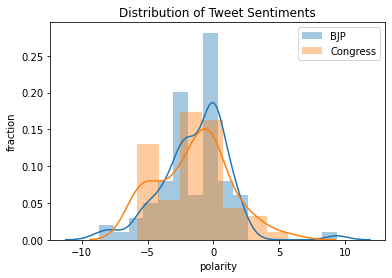

In [ ]:
sns.distplot(tweet_text[tweet_text["text"].str.lower().str.contains("bjp")]["polarity"], label = "BJP")
sns.distplot(tweet_text[tweet_text["text"].str.lower().str.contains("congress")]["polarity"], label = "Congress")
plt.title("Distribution of Tweet Sentiments")
plt.ylabel("fraction")
plt.legend();

A distribution of tweet sentiments on the two main political parties, BJP and Congress, using VADER is shown here. BJP, the current party in power, seems have to more variance in polarity but a higher fraction of positive sentiment. This result is surprising as BJP is a conservative party and has been accused of spreading fake news, and most users on Twitter in India are young and liberal.

Removing URLs from the tweet text to further analyze the text:

In [ ]:
set(tweet_text['no_punc'])

def remove_url(x):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", x).split())


fake_news_tweets = tweet_text['text']
fake_news_no_urls = [remove_url(w) for w in fake_news_tweets]

Converting the text to lowercase:

In [ ]:
lower_fake_news = [word.lower() for word in fake_news_no_urls]
set(lower_fake_news)

Splitting sentences into individual words for data manipulation:

In [ ]:
words_in_tweet_fake_news = [w.lower().split() for w in fake_news_no_urls]

Preparing and checking out the most common words in the data:

In [ ]:
import itertools
import collections

fake_news_no_urls = list(itertools.chain(*words_in_tweet_fake_news))
counts_no_urls = collections.Counter(fake_news_no_urls)
counts_no_urls.most_common(25)

fake_news_no_urls[:5]

['lipeestevao', 'ashoswai', 'no', 'bhutan', 'has']

In [ ]:
fake_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(25),columns=['words', 'count'])

fake_tweets_no_urls.head()

,words,count
0,fake,2622
1,news,2432
2,india,1855
3,is,1341
4,in,1314


Removing common words and pronouns from the list of most common words using the NLTK package to get meaningful results:

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
pronouns = ['im', 'us', 'he', 'she', 'his', 'their', 'like', 'youre', 'theyre', 'one', 'please', 'dont']
pronouns = set(pronouns)

fake_news_ns = [[w for w in fake_news_list if not w in stop_words|pronouns] for fake_news_list in words_in_tweet_fake_news]
fake_news_words_ns = list(itertools.chain(*fake_news_ns))
fake_news_count_ns = collections.Counter(fake_news_words_ns)

fake_news_tweets_ns = pd.DataFrame(fake_news_count_ns.most_common(15), columns=['words', 'count'])
fake_news_tweets_ns

clean_fake_news_sorted = fake_news_tweets_ns.sort_values(by='count', ascending = False)
clean_fake_news_sorted

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,words,count
0,fake,2622
1,news,2432
2,india,1855
3,china,403
4,chinese,354
5,spreading,306
6,indian,280
7,media,274
8,check,240
9,fact,236


Visualizing the most common words:

Text(0.5, 1.0, 'Most Commonly Used Words')

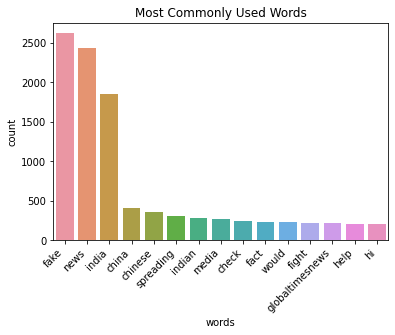

In [ ]:
fig, ax = plt.subplots()

ax = sns.barplot(x="words", y="count", data=clean_fake_news_sorted)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Most Commonly Used Words")

Preparing and checking out the bigrams (sequence of two adjacent words) using the NLTK package:

In [ ]:
from nltk import bigrams
paired = [(bigrams(w)) for w in fake_news_ns]

In [ ]:
bigrams = list(itertools.chain(*paired))

In [ ]:
bigram_counts = collections.Counter(bigrams)

fake_news_bigram = pd.DataFrame(bigram_counts.most_common(10))
fake_news_bigram

,0,1
0,"(fake, news)",1987
1,"(news, india)",410
2,"(spreading, fake)",249
3,"(fact, check)",210
4,"(hi, fact)",199
5,"(check, bot)",199
6,"(bot, would)",199
7,"(would, help)",199
8,"(help, fight)",199
9,"(fight, fake)",199


People seem to be calling bots on Twitter to fact check news.

Creating a wordcloud for a more aesthetic visualization of the most common words:

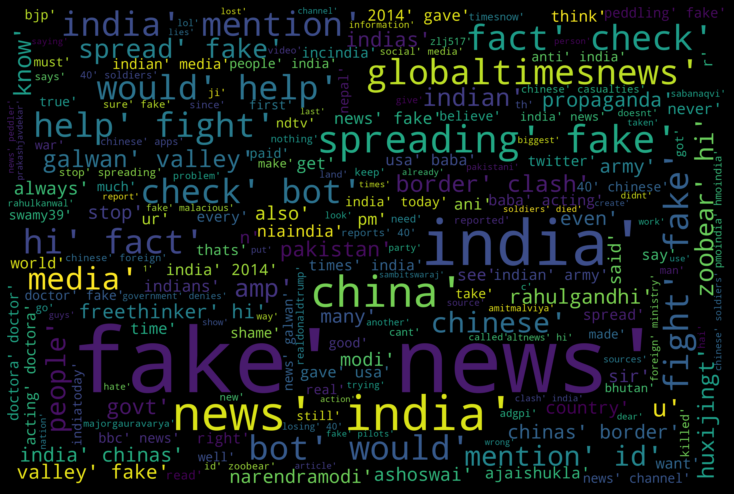

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(fake_news_words_ns))
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

The ongoing military conflict between India and China seems to be a big part of the rhetoric online. At least 20 Indian soldiers were killed on June 16 and a lot of fake news has subsequently proceeded to appear on social media about the conflict.

Now I will move on to summarize and analyze everything I have done in this notebook.

# **Interpretation of Results:**

My project aims to give an insight into fake news in India, and hence, it utilizes two primary datasets. First, is the collection of articles from the Times of India that are flagged for being on fake news. The project subsequently explores this dataset to get meaningful results from the dataset and to make conclusions out of it. Second, is the collection of a week's worth of tweets from Twitter based on the query 'india fake news'. More complex tools and methods such as Tweepy, VADER, NLTK, and Wordclouds are used to interpret this data and to understand the sentiment behind people's opinions on Twitter regarding fake news in India.

In the first dataset, the news articles are from late 2017 to June 2018 as a lot of mob lynchings happened due to WhatsApp during that time. Using a list of keywords, the top words in articles about fake news, besides 'whatsapp', came out to be 'police', 'crime', 'fir', 'arrest', 'death'. These keywords related to crime were chosen due to the mob lynchings and violent crimes in India that happened due to WhatsApp. The unifying theme in these articles on fake news came out to be crime, which is unsurprising when we consider the consequences of fake news in India in 2017-18.

From the second dataseet, a distribution of tweet sentiments on the two main political parties, BJP and Congress, using VADER showed that BJP, the current party in power, seems have to more variance in polarity but a higher fraction of positive sentiment. This result is surprising since BJP is a conservative party and most users on Twitter in India are young and liberal. Additionally, the ongoing military conflict between India and China seems to be a big part of the rhetoric online. At least 20 Indian soldiers were killed on June 16, 2020, and a lot of fake news has subsequently proceeded to appear on social media about the conflict.

Overall, the notebook shows how powerful and dangerous fake news can be in a developing economy such as India, where people are still naive to the threats presented by misinformation found online. A lot of this fake news seems to revolve around crime that is even more dangerous than bipartisan fake news surrounding politics, that is commonly found in the US. 

Further work can be done using the data and ideas presented in this notebook to understand fake news and potentially make use of the same datasets to extract different information from them. Potentially, it will be really interesting to find real examples of fake news and find the most common words and phrases in them. This task will be more challenging as fake news might come in the form of text, audio, photo, and video. Even further research can be done into the intention behind people spreading fake news.

# **Works Cited and References:**

1. https://www.tweepy.org/ - An easy-to-use Python library for accessing the Twitter API
2. https://github.com/cjhutto/vaderSentiment  - VADER Sentiment Analysis
3. https://github.com/sahitpj/India-WhatsAppFakeNews-Dataset - India WhatsApp Fake News Dataset
4. http://www.ds100.org/ - Data 100: Principles and Techniques of Data Science
5. https://www.toptal.com/python/twitter-data-mining-using-python - Twitter Data Mining: A Guide to Big Data Analytics Using Python
6. https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk - Text Analytics for Beginners using NLTK
7. https://stackoverflow.com/ - Stack Overflow 